In [10]:
from keras.applications import VGG16 
conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150, 150, 3))
conv_base.trainable = False

from keras import models
from keras import layers 
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               2097408   
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [11]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator 
base_dir = '/home/jovyan/work/newCatAndDog' 
# base_dir = '/Users/fchollet/Downloads/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train') 
validation_dir = os.path.join(base_dir, 'validation') 
test_dir = os.path.join(base_dir, 'test') 

In [12]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers 
train_datagen = ImageDataGenerator(
                                     rescale=1./255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest') 
test_datagen = ImageDataGenerator(rescale=1./255) 
train_generator = train_datagen.flow_from_directory(
                                     train_dir, 
                                     target_size=(150, 150), 
                                     batch_size=20,
                                     class_mode='binary') 
validation_generator = test_datagen.flow_from_directory(
                                     validation_dir,
                                     target_size=(150, 150),
                                     batch_size=20,
                                     class_mode='binary') 
model.compile(loss='binary_crossentropy',
                                     optimizer=optimizers.RMSprop(learning_rate=2e-5),
                                     metrics=['acc']) 
history = model.fit(
                                     train_generator,
                                     steps_per_epoch=100,
                                     epochs=30,
                                     validation_data=validation_generator,
                                     validation_steps=50)

Found 5000 images belonging to 2 classes.
Found 998 images belonging to 2 classes.
Epoch 1/30


2023-06-18 03:10:09.245798: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


100/100 [==============================] - ETA: 0s - loss: 0.6018 - acc: 0.6810

2023-06-18 03:11:15.237836: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


100/100 [==============================] - 100s 1s/step - loss: 0.6018 - acc: 0.6810 - val_loss: 0.4563 - val_acc: 0.8136
Epoch 2/30
100/100 [==============================] - 103s 1s/step - loss: 0.4834 - acc: 0.7860 - val_loss: 0.3699 - val_acc: 0.8507
Epoch 3/30
100/100 [==============================] - 102s 1s/step - loss: 0.4339 - acc: 0.8160 - val_loss: 0.3422 - val_acc: 0.8527
Epoch 4/30
100/100 [==============================] - 102s 1s/step - loss: 0.4029 - acc: 0.8305 - val_loss: 0.3222 - val_acc: 0.8617
Epoch 5/30
100/100 [==============================] - 102s 1s/step - loss: 0.3920 - acc: 0.8240 - val_loss: 0.3150 - val_acc: 0.8677
Epoch 6/30
100/100 [==============================] - 102s 1s/step - loss: 0.3771 - acc: 0.8310 - val_loss: 0.2961 - val_acc: 0.8687
Epoch 7/30
100/100 [==============================] - 102s 1s/step - loss: 0.3606 - acc: 0.8455 - val_loss: 0.2868 - val_acc: 0.8717
Epoch 8/30
100/100 [==============================] - 102s 1s/step - loss: 0.353

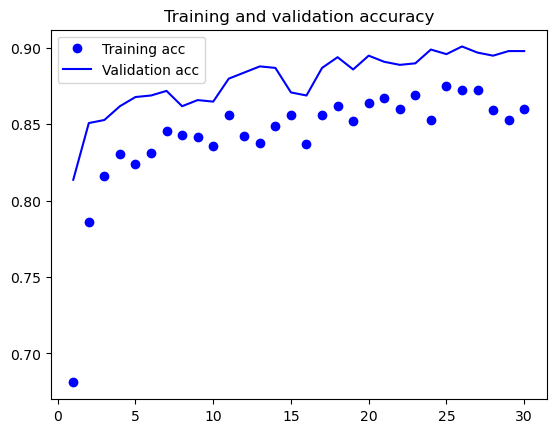

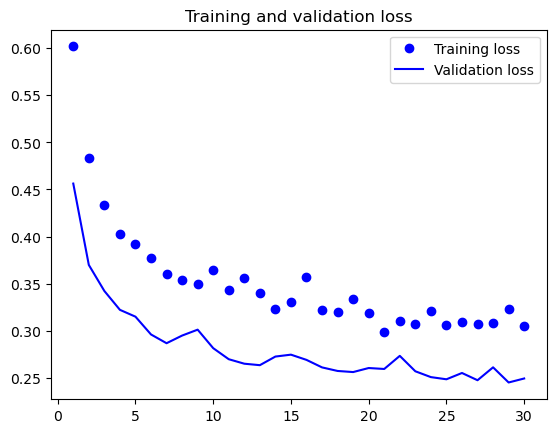

In [13]:
import matplotlib.pyplot as plt 
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss'] 
epochs = range(1, len(acc) + 1) 
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend() 
plt.figure() 
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend() 
plt.show()